## Linear Regression


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
# Data
z = np.array([256000, 264000, 273000, 281000, 296000, 310000, 344000, 351000, 363000, 376000, 386000, 393000, 417000, 445000, 461000])
x = np.array([14000, 15000, 16000, 17000, 17000, 18000, 20000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000])
y = np.array([129000, 136000, 142000, 145000, 149000, 161000, 180000, 185000, 193000, 200000, 204000, 208000, 212000, 219000, 226000])

# Creating the design matrix
data = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)), axis=1)

# Calculating the parameters of the linear regression model
p = np.linalg.inv(data.T @ data) @ data.T @ z

# Prediction
x1fit = np.arange(min(data[:, 0]), max(data[:, 0]), 100)
x2fit = np.arange(min(data[:, 1]), max(data[:, 1]), 100)
X1, X2 = np.meshgrid(x1fit, x2fit)
LS = p[0] * X1 + p[1] * X2 + p[2]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], z, c='r', marker='o', linewidth=6, s=40, facecolors='none', label='data')
ax.plot_surface(X1, X2, LS, alpha=0.85, color=[0.35, 0.35, 0.35])
ax.set_xlabel('Education expenditure', fontsize=10)
ax.set_ylabel('Employee compensation', fontsize=10)
ax.set_zlabel('GDP', fontsize=10)
ax.legend(['multiple linear regression plane'], loc='upper left', fontsize=10)
plt.show()

In [7]:
print(X1, X2)

[[14000 14100 14200 ... 28700 28800 28900]
 [14000 14100 14200 ... 28700 28800 28900]
 [14000 14100 14200 ... 28700 28800 28900]
 ...
 [14000 14100 14200 ... 28700 28800 28900]
 [14000 14100 14200 ... 28700 28800 28900]
 [14000 14100 14200 ... 28700 28800 28900]] [[129000 129000 129000 ... 129000 129000 129000]
 [129100 129100 129100 ... 129100 129100 129100]
 [129200 129200 129200 ... 129200 129200 129200]
 ...
 [225700 225700 225700 ... 225700 225700 225700]
 [225800 225800 225800 ... 225800 225800 225800]
 [225900 225900 225900 ... 225900 225900 225900]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#Energy consumption based on humidity and wind
# model is: y = a + bx1 + cx2

# df = pd.read_excel('excel.xlsx')
# print(df)
# x_data = df.temp
# y_data = df.sale

y = np.array([100, 120, 110, 90, 130, 105, 115, 95, 125, 112])
x1 = np.array([60,70,75,55,80,65,68,62,72,67])
x2 = np.array([10,8,5,12,6,9,7,11,4,8])

# Stack the independent variables into a design matrix
X = np.column_stack((np.ones(len(y)),x1, x2))

# Calculate the coefficients using the normal equation
coefficients = np.matmul(np.linalg.inv(np.matmul(X.T, X)) ,np.matmul(X.T, y))

# Print the coefficients
print("Coefficient a's value:", coefficients[0])
print("Coefficient b's for x:", coefficients[1])
print("Coefficient c's for y:", coefficients[2])

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Separate points below and above the plane
below_plane = y < (coefficients[0] + coefficients[1] * x1 + coefficients[2] * x2)
above_plane = ~below_plane

# Scatter plot points below the plane with one color and above with other
ax.scatter(x1[below_plane], x2[below_plane], y[below_plane],s=100, c='b', label='Below Plane', marker = 'o')
ax.scatter(x1[above_plane], x2[above_plane], y[above_plane],s=100, c='r', label='Above Plane', marker = 'o')

# Create grid for the plane
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))
# X1, X2 = np.meshgrid(x1, x2)


# Calculate Z values for the plane
Z = coefficients[0]+ coefficients[1] * X1 + coefficients[2] * X2
# Z = coefficients[0]+ coefficients[1] * x1 + coefficients[2] * x2

ax.plot_surface(X1, X2, Z, alpha=0.5, color='green')

ax.set_xlabel('Humidity (not in percentage)', fontsize=10)
ax.set_ylabel('wind Speed (Km/hour)', fontsize=10)
ax.set_zlabel('Energy Consumption (kWh)', fontsize=10)
ax.set_title('Fitted Plane(a + bx + cy)', fontsize=15)
ax.view_init(elev=30, azim=250)
ax.legend()
plt.show()
C = coefficients[0]+ coefficients[1] * 1 + coefficients[2] * (-1)
print(" at point 1 and -1, the value is: ",C)

Coefficient a's value: 46.54938271603896
Coefficient b's for x: 1.1172839506173489
Coefficient c's for y: -1.4567901234568126
 at point 1 and -1, the value is:  49.123456790113124


Text(0.5, 0.92, 'Fitted Plane')

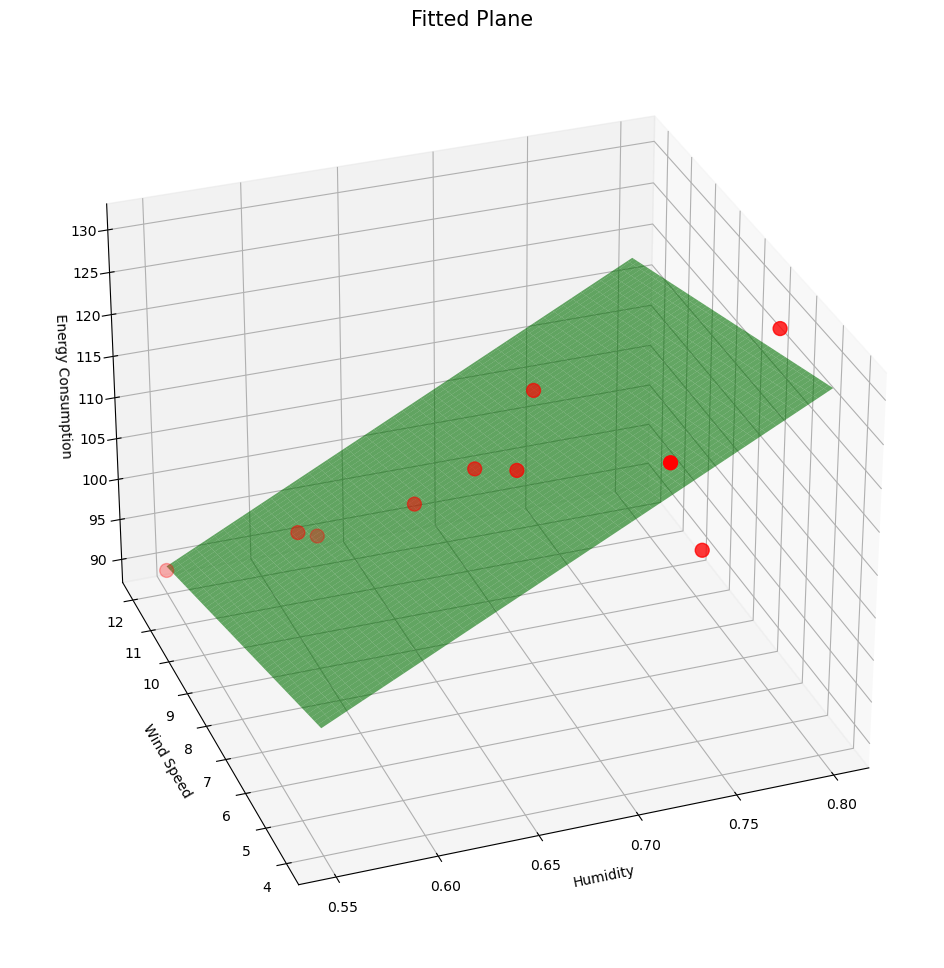

In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

A = sp.Matrix([[1, 0.6, 10],
                   [1, 0.7, 8],
                   [1, 0.75, 5],
                   [1, 0.55, 12],
                   [1, 0.8, 6],
                   [1, 0.65, 9],
                   [1, 0.68, 7],
                   [1, 0.62, 11],
                   [1, 0.72, 4],
                   [1, 0.67, 8]])

q = sp.Matrix([[100],
               [120],
               [110],
               [90],
               [130],
               [105],
               [115],
               [95],
               [125],
               [112]])

a, b, c = sp.symbols('a b c')
p = sp.Matrix([a, b, c])

AT = A.transpose()
AT_A = AT @ A
AT_A_inv = AT_A.inv()
AT_A_inv_AT = AT_A_inv @ AT
p = AT_A_inv_AT @ q

a_val = p[0]
b_val = p[1]
c_val = p[2]

x_data = np.array(A[:, 1], dtype=float)
y_data = np.array(A[:, 2], dtype=float)
z_data = np.array(q, dtype=float)

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, label="Data Points", c ='r', s = 100)

x_grid, y_grid = np.meshgrid(np.linspace(min(x_data), max(x_data), 100), np.linspace(min(y_data), max(y_data), 100))
z_grid = np.array(a_val + b_val * x_grid + c_val * y_grid, dtype=float)

ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.6, label="Fitting Plane", color='g')
ax.set_xlabel('Humidity')
ax.set_ylabel('Wind Speed')
ax.set_zlabel('Energy Consumption')
ax.view_init(elev=30, azim=250)
ax.set_title('Fitted Plane', fontsize=15)
